In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('datasets/Admission_Prediction.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          485 non-null    float64
 2   TOEFL Score        490 non-null    float64
 3   University Rating  485 non-null    float64
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 35.3 KB


In [35]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [36]:
ad = pd.DataFrame(data)
admission = ad.dropna()
admission.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [37]:
from sklearn.utils import shuffle

In [39]:
df_shuffle = shuffle(admission, random_state=42)

In [40]:
df_shuffle.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
138,139,326.0,116.0,2.0,4.5,3.0,9.08,1,0.80
34,35,331.0,112.0,5.0,4.0,5.0,9.80,1,0.94
219,220,312.0,104.0,3.0,3.5,3.5,8.42,0,0.74
476,477,304.0,104.0,3.0,2.5,2.0,8.12,0,0.62
169,170,311.0,99.0,2.0,2.5,3.0,7.98,0,0.65


In [41]:
DV = 'Chance of Admit'

In [42]:
X = df_shuffle.drop(['Chance of Admit', 'Serial No.'], axis=1)

In [43]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
138,326.0,116.0,2.0,4.5,3.0,9.08,1
34,331.0,112.0,5.0,4.0,5.0,9.80,1
219,312.0,104.0,3.0,3.5,3.5,8.42,0
476,304.0,104.0,3.0,2.5,2.0,8.12,0
169,311.0,99.0,2.0,2.5,3.0,7.98,0


In [44]:
y = df_shuffle[DV]

In [45]:
y.head()

138    0.80
34     0.94
219    0.74
476    0.62
169    0.65
Name: Chance of Admit, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [48]:
X_train.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
131,303.0,105.0,5.0,5.0,4.5,8.65,0
37,300.0,105.0,1.0,1.0,2.0,7.80,0
263,324.0,111.0,3.0,2.5,1.5,8.79,1
192,322.0,114.0,5.0,4.5,4.0,8.94,1
91,299.0,97.0,3.0,5.0,3.5,7.66,0


In [49]:
X_train.shape

(308, 7)

In [50]:
# Fitting and Instantiating the regression
from sklearn.linear_model import LinearRegression

In [51]:
model = LinearRegression()

In [52]:
model.fit(X_train, y_train)

LinearRegression()

In [53]:
model.intercept_

-1.1051673168408533

In [54]:
model.coef_

array([ 0.00109136,  0.00287932,  0.01171375, -0.00259318,  0.01399263,
        0.12578066,  0.02834933])

In [55]:
pred = model.predict(X_test)

In [56]:
pred.shape

(152,)

# Plotting Residuals

In [57]:
import matplotlib.pyplot as plt

In [58]:
from scipy.stats import pearsonr

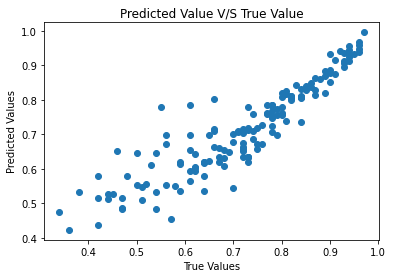

In [59]:
plt.scatter(y_test, pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Predicted Value V/S True Value')
plt.show()

In [61]:
import seaborn as sns
from scipy.stats import shapiro

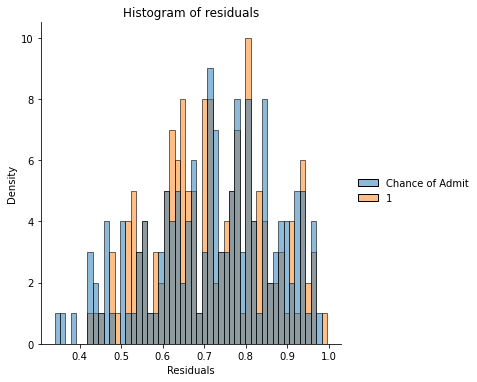

In [62]:
sns.displot((y_test, pred), bins=50)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of residuals')
plt.show()

# Computing metrics for mae, mse, r2

In [63]:
from sklearn import metrics

In [64]:
metric_df = pd.DataFrame({'Metric' : ['MAE', 'MSE', 'RMSE', 'R-squared'],
                         'Value':[metrics.mean_absolute_error(y_test, pred),
                                 metrics.mean_squared_error(y_test, pred),
                                 np.sqrt(metrics.mean_squared_error(y_test, pred)),
                                 metrics.explained_variance_score(y_test, pred)]}).round(3)

In [65]:
metric_df

,Metric,Value
0,MAE,0.045
1,MSE,0.004
2,RMSE,0.062
3,R-squared,0.830
